<a href="https://colab.research.google.com/github/debnathch/boombikes_sharing_linerReg/blob/main/boombikes_sharing_assignmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


#Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



Import Library

In [1976]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#import numpy and pandas
import numpy as np
import pandas as pd


#Step 1: Reading and Understanding the Data

In [1894]:
df=pd.read_csv('https://raw.githubusercontent.com/debnathch/boombikes_sharing_linerReg/master/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1895]:
# dimensions of the data (number of rows and columns)
df.shape

(730, 16)

In [1896]:
# describing the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1897]:
#show the column
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1898]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Data check - as info say there is no missing value ... only checking the duplicate

In [1899]:
# Checking for duplicate values
df.drop_duplicates(inplace=True)
df.shape

(730, 16)

#Step 3: Data Preparation

converting categorical variables to their subcategories

In [1900]:
#converting seasons values from 1,2,3,4 to spring,summer,fall,winter resp.
def ass_seasons(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

In [1901]:
df.season.value_counts()

,count
season,
3,188
2,184
1,180
4,178


In [1902]:
df['season']=df['season'].apply(ass_seasons)
#df.season = df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [1903]:
df.season.value_counts()

,count
season,
fall,188
summer,184
spring,180
winter,178


In [1904]:
# contverting mnth values from 1-12 to jan-dec
def ass_mnth(x):
    return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [1905]:
df.mnth=df[['mnth']].apply(ass_mnth)

In [1906]:
df.mnth.value_counts()

,count
mnth,
jan,62
mar,62
may,62
jul,62
aug,62
oct,62
dec,62
apr,60
jun,60


In [1907]:
df.weekday.value_counts()

,count
weekday,
6,105
0,105
1,105
2,104
4,104
5,104
3,103


In [1908]:
# converting day of the week from 0-6 to sun-sat
def ass_weekdays(x):
    return x.map({0:'sun', 1:'mon', 2:'tues',3:'wed', 4:'thurs', 5:'fri', 6:'sat'})

In [1909]:
df.weekday=df[['weekday']].apply(ass_weekdays)

In [1910]:
df.weekday.value_counts()

,count
weekday,
sat,105
sun,105
mon,105
tues,104
thurs,104
fri,104
wed,103


In [1911]:
#convereting the weather varible as 1,2,3,4 to clear, mist , snow , rainy.
def ass_weather(x):
    return x.map ({1:'clear', 2:'mist', 3:'snow', 4:'rainy'})

In [1912]:
df[['weathersit']]=df[['weathersit']].apply(ass_weather)

In [1913]:
df.weathersit.value_counts()

,count
weathersit,
clear,463
mist,246
snow,21


#Step 3: Visualising the Data

##Visualising Numeric Variables : Using a pairplot

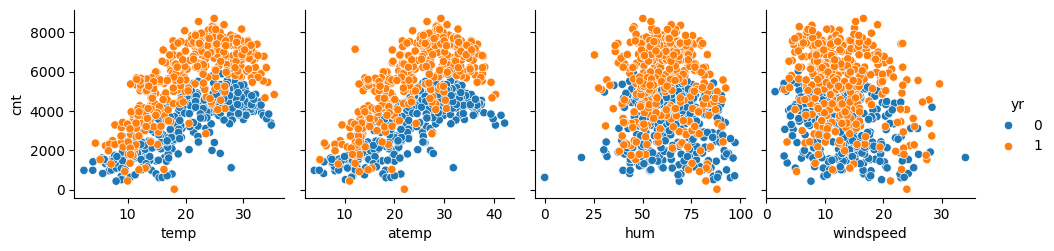

In [1914]:
#import EDA related lib
# Analysing the continuous (numerical) variables
import matplotlib.pyplot as plt
import seaborn as sns


#set hue='yr' -  instructing the function to color the data points in the plot based on the values in the 'yr' column of DataFrame.
sns.pairplot(data=df, x_vars=['temp', 'atemp', 'hum','windspeed'],y_vars=['cnt'],hue ='yr')
plt.show()

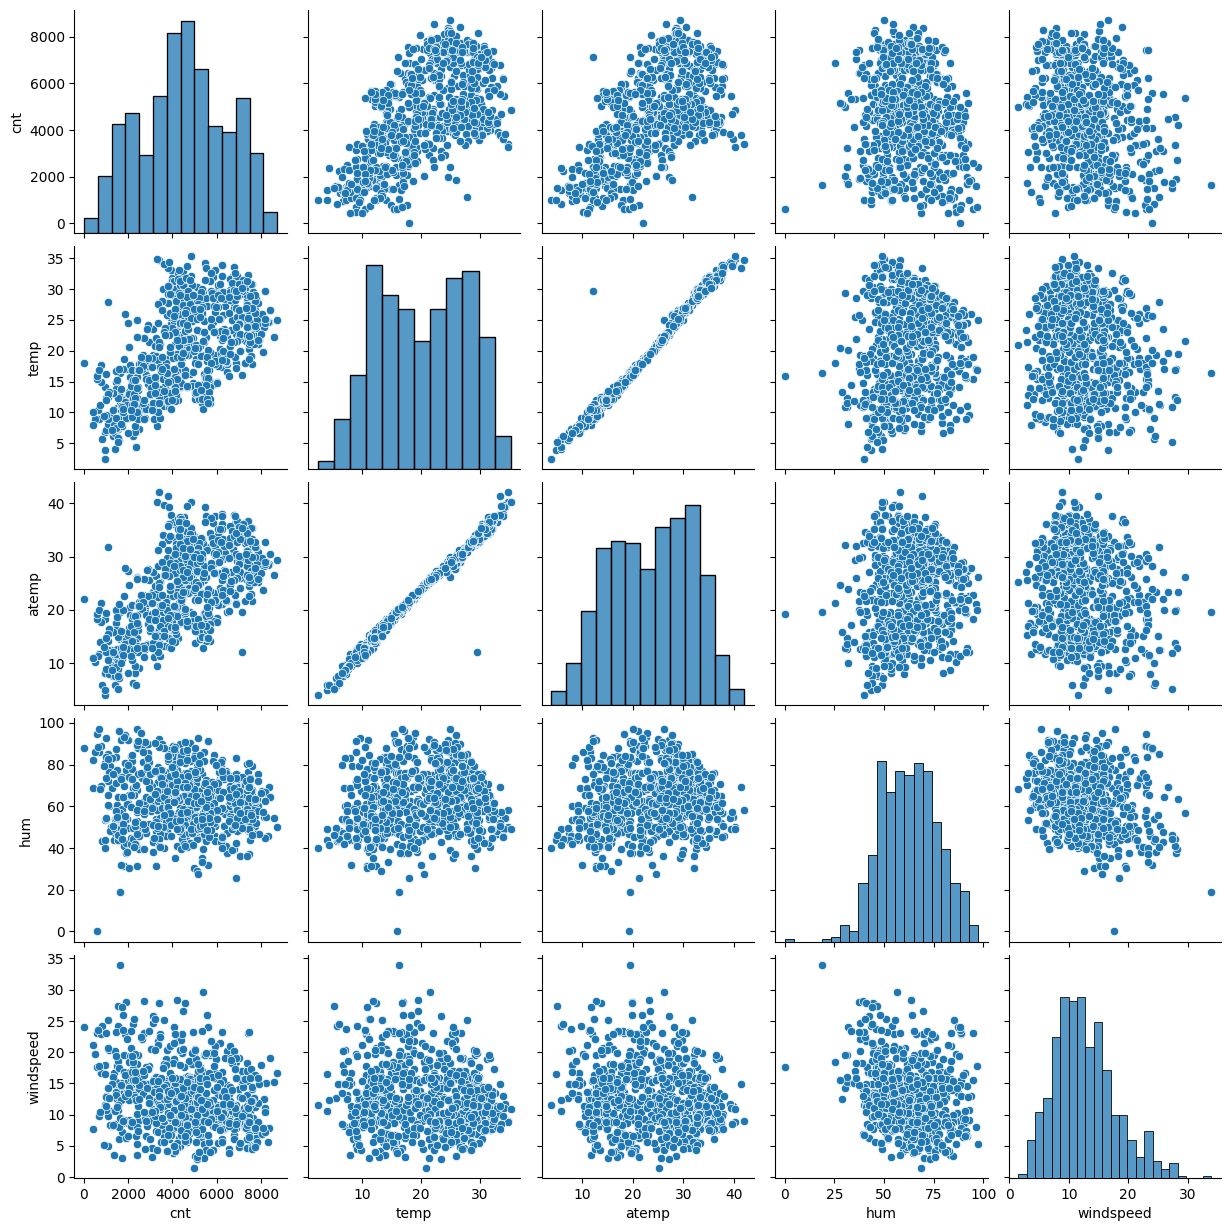

In [1915]:
sns.pairplot(data=df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

**Insights**:

By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp . that show a positive correlation with the target variable cnt . Moreover it clearly shows how yr count has been increased by keeping same temp and atemp

Data Visualization


Analysing the continuous (numerical) variables

temp, atemp ,hum and cnt displot

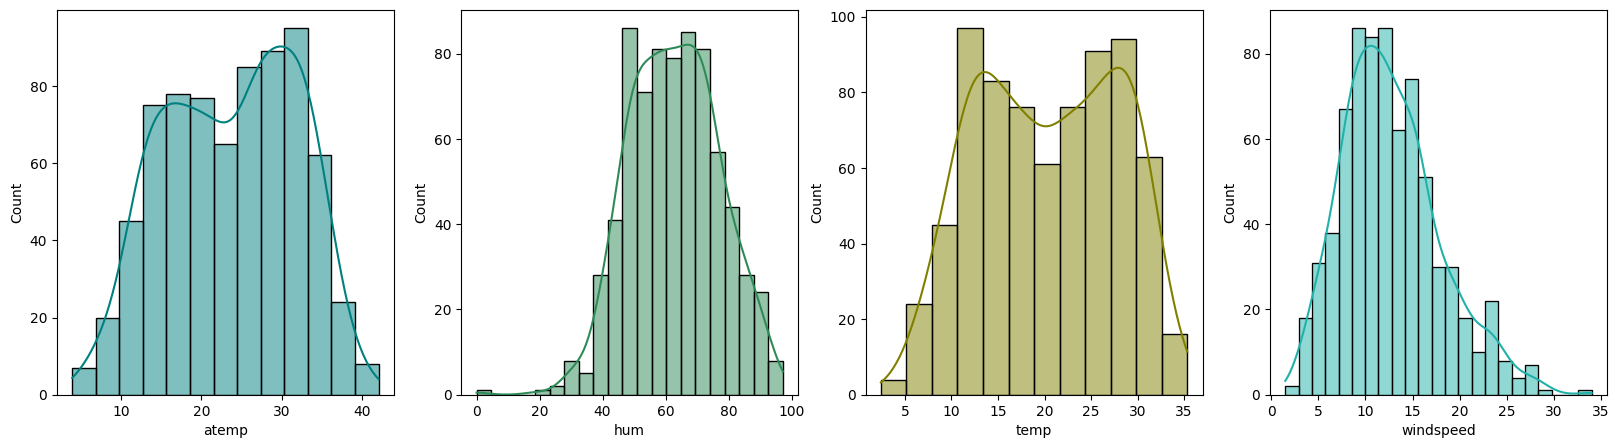

In [1916]:
# Analysing the continuous (numerical) variables

continuous_config = {
    'atemp': { 'color': 'teal' },
    'hum': { 'color': 'seagreen' },
    'temp': { 'color': 'olive' },
    'windspeed': { 'color': 'lightseagreen' }
}

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

for i, (dim, config) in enumerate(continuous_config.items()):
    sns.histplot(data = df, x = dim, ax = ax[i], color = config['color'], kde = True)

plt.show()

# **Insigts**
1. Bikes were rented at an average temperature (temp) of 20°C.
2. The average feeling temperature (atemp) during bike rentals is approximately 24°C.
3. Humidity (hum) averaged around 65 during bike rentals.
4. The average windspeed (windspeed) during bike rentals is approximately 12.

Analysing the categorical variables

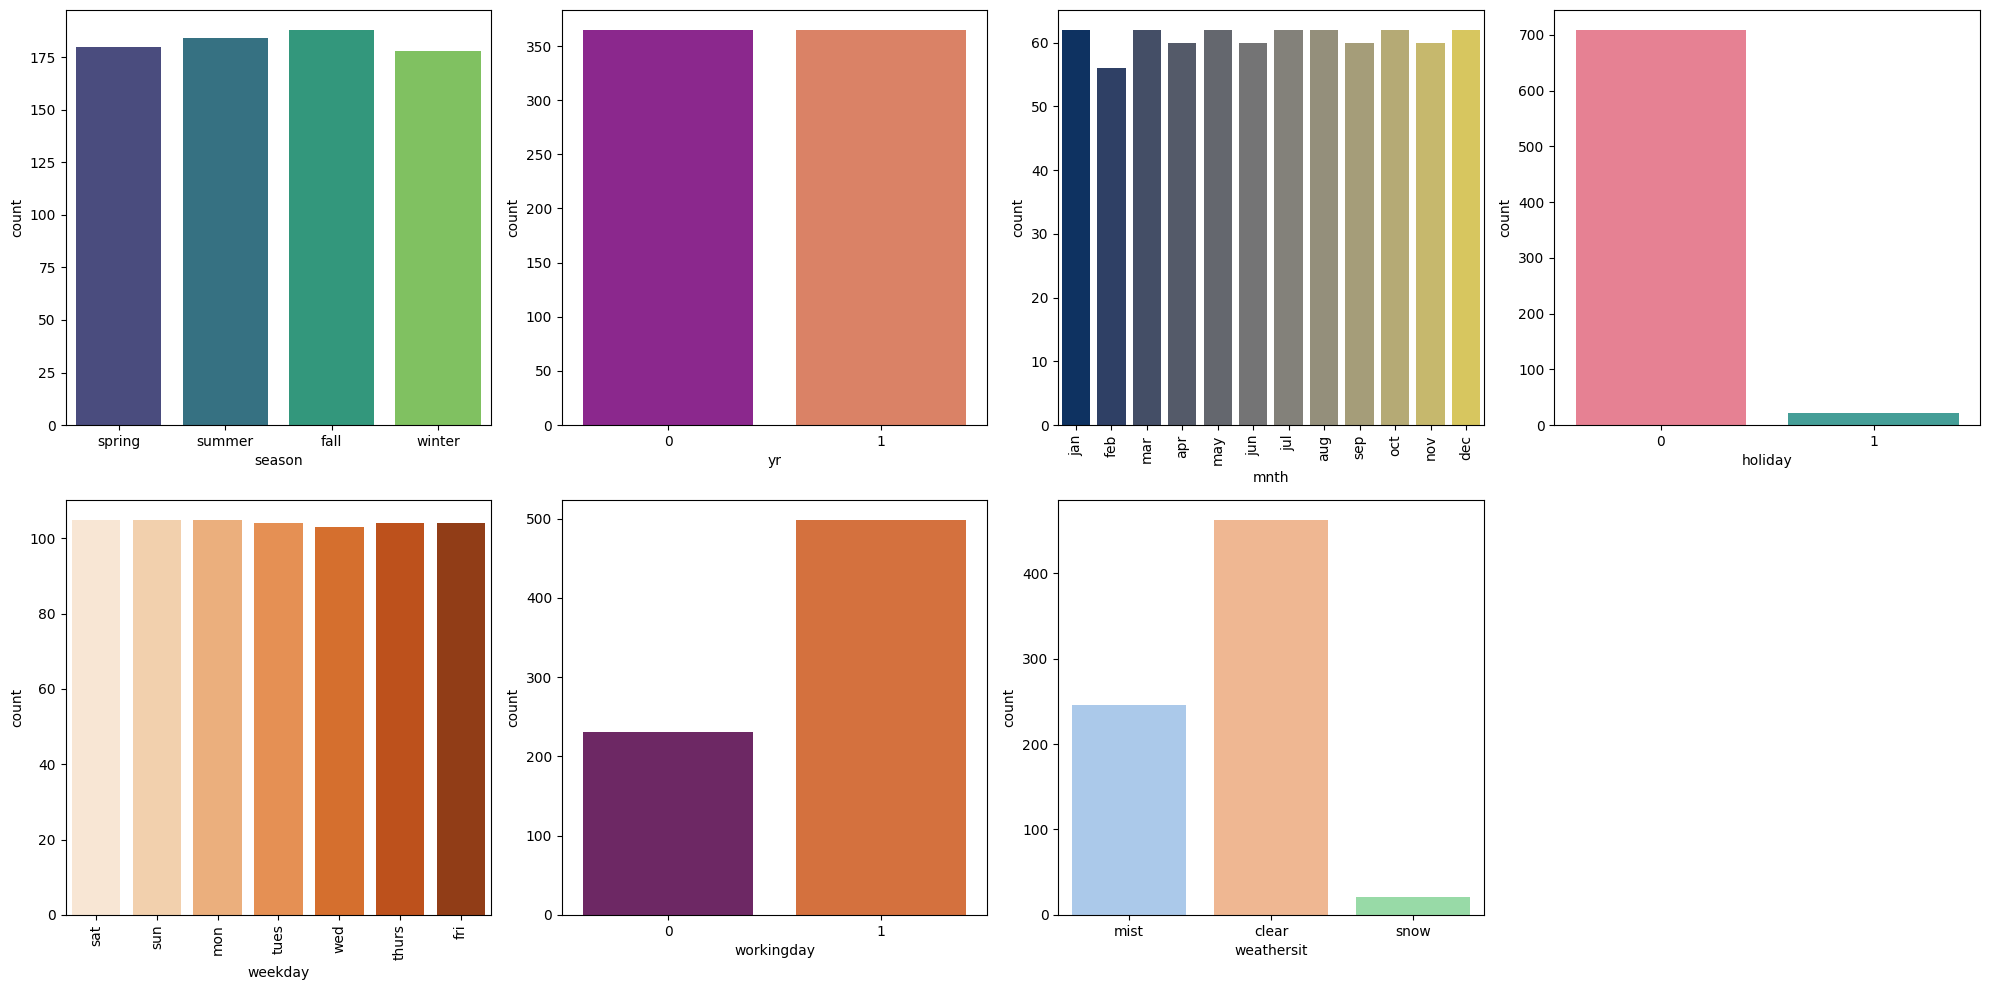

In [1917]:
# Analysing the categorical variables

categorical_config = {
    'season': { 'rotation': 0, 'palette': 'viridis' },
    'yr': { 'rotation': 0, 'palette': 'plasma' },
    'mnth': { 'rotation': 90, 'palette': 'cividis' },
    'holiday': { 'rotation': 0, 'palette': 'husl' },
    'weekday': { 'rotation': 90, 'palette': 'Oranges' },
    'workingday': { 'rotation': 0, 'palette': 'inferno' },
    'weathersit': { 'rotation': 0, 'palette': 'pastel' }
}

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

for i, (cat, config) in enumerate(categorical_config.items()):
    sns.countplot(data = df, x = cat, palette = config['palette'], ax = ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_xticklabels(ax[i // 4, i % 4].get_xticklabels(), rotation = config['rotation'])

# Hide the last column
ax[1, 3].axis('off')

df_categorical =df

plt.tight_layout()
plt.show()

1. Bike rentals are more frequent in favorable weather.
2. Preference for bike rentals is observed on working days and non-holidays.
3. Minimal variation is noted in other categorical variables across different categories.

Data info collection and prepare data

In [1918]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [1919]:
df['dteday']=df['dteday'].astype('datetime64[ns]')
df.dteday

,dteday
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
...,...
725,2019-12-27
726,2019-12-28
727,2019-12-29
728,2019-12-30



Visulaizing the discrete (numerical) - categorical variables

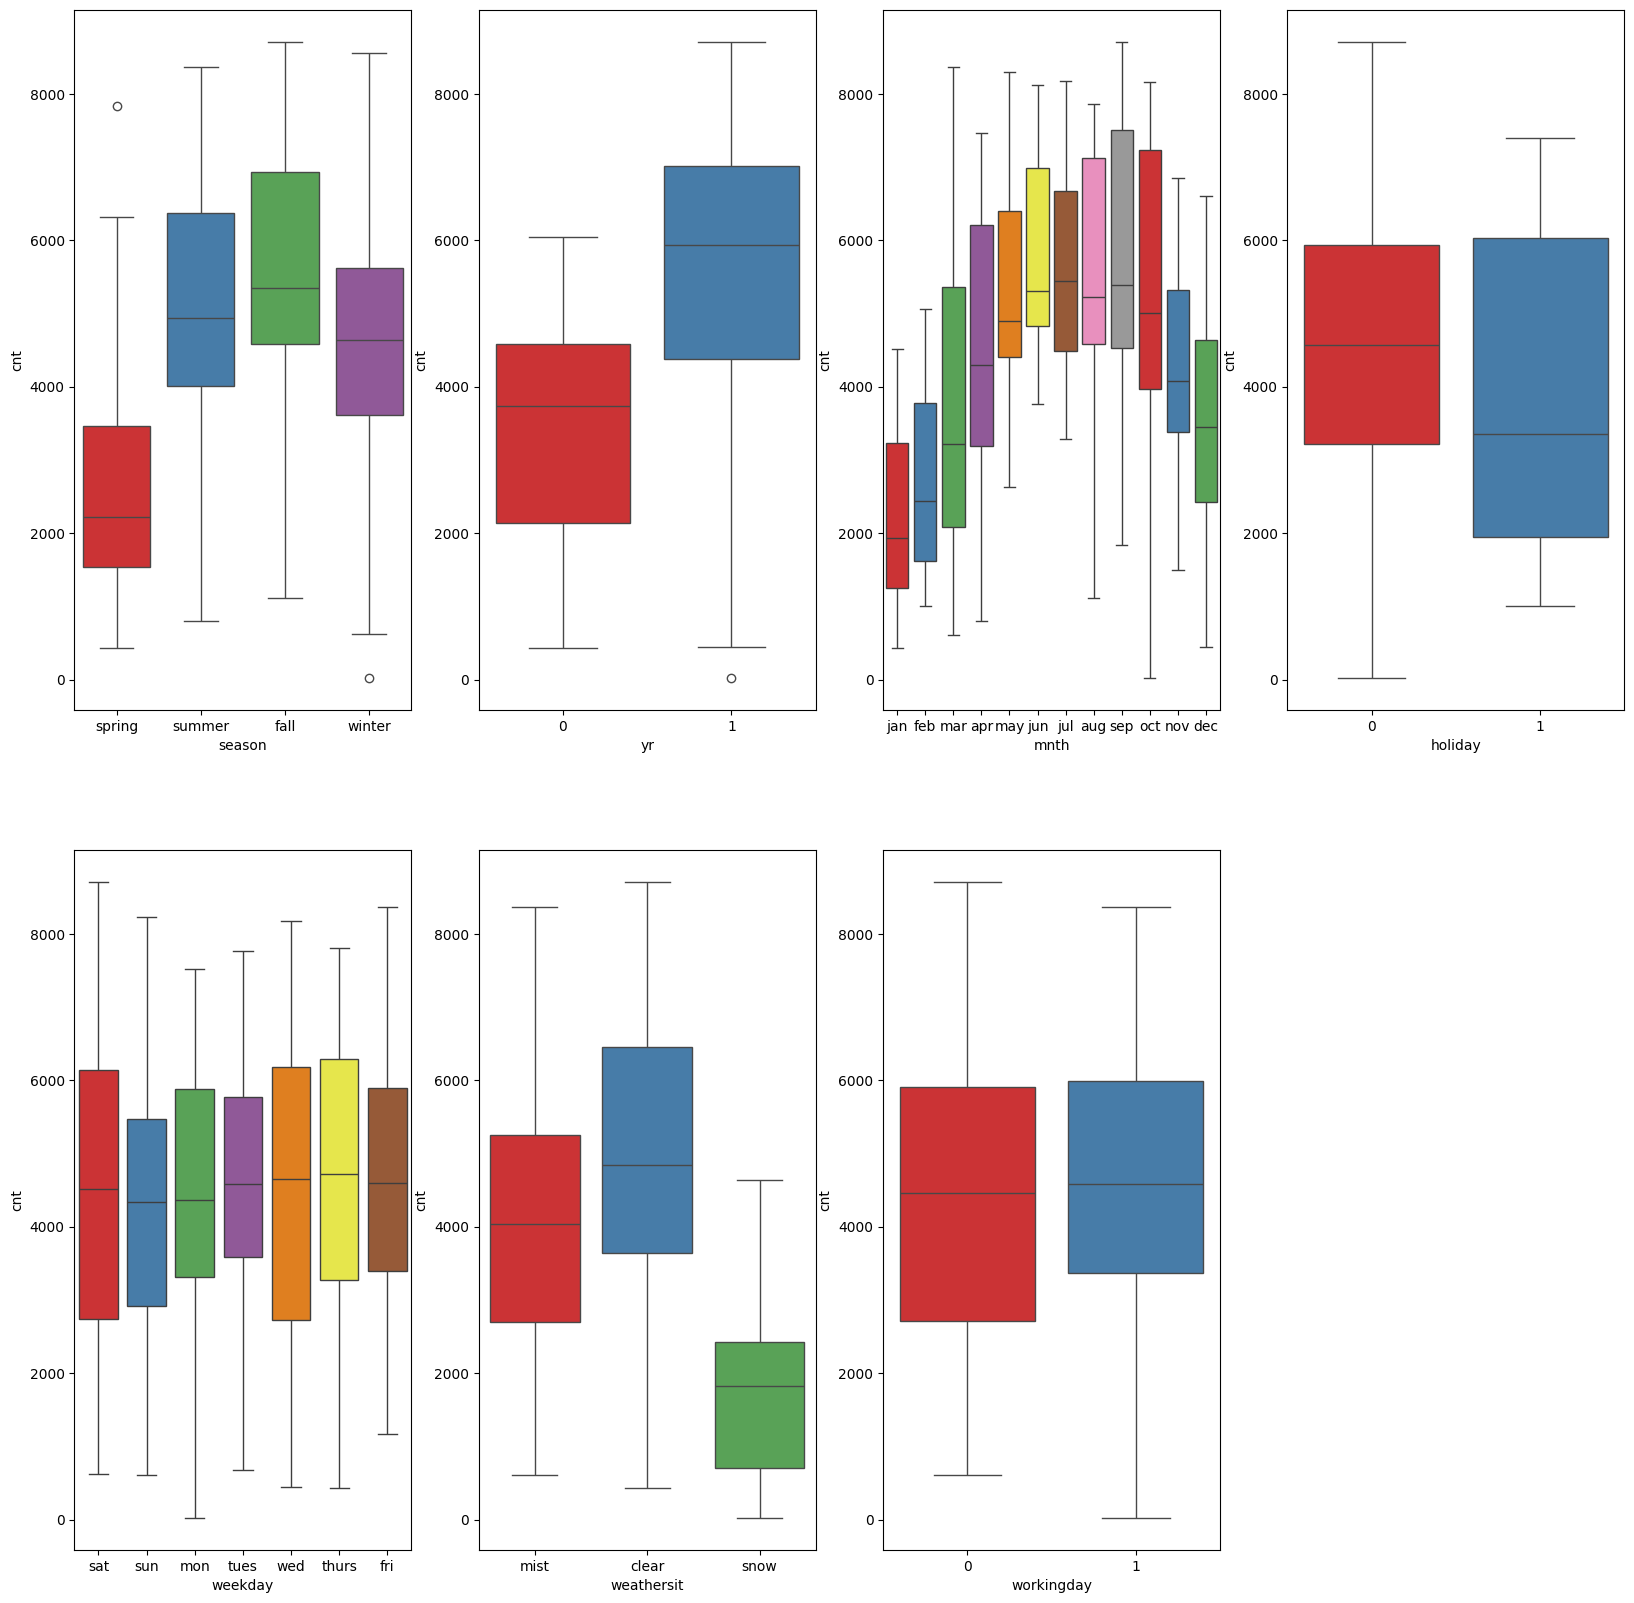

In [1920]:
#visualizing categorical variables
plt.figure(figsize=(20,20))
plt.subplot(2,4,1)

sns.boxplot(x='season', y='cnt',data=df,palette='Set1')
plt.subplot(2,4,2)

sns.boxplot(x='yr', y='cnt',data=df,palette='Set1')
plt.subplot(2,4,3)

sns.boxplot(x='mnth', y='cnt',data=df,palette='Set1')
plt.subplot(2,4,4)

sns.boxplot(x='holiday', y='cnt',data=df,palette='Set1')
plt.subplot(2,4,5)

sns.boxplot(x='weekday', y='cnt',data=df,palette='Set1')
plt.subplot(2,4,6)

sns.boxplot(x='weathersit', y='cnt',data=df,palette='Set1')

plt.subplot(2,4,7)

sns.boxplot(x = 'workingday', y = 'cnt', data = df,palette='Set1')
plt.show();

**Inferences from EDA of categorical and numerical variables:**
1. Season - We can notice a positive trend in the number of customers in spring to summer and fall and then it drops in winter
2. Year - The overall business shows a increasing trend in their user base year on year
3. Month - Similar to the season trend, there is a postive trend in the months of summer, fall and winter.
4. Holiday : On holidays, the users show a wider spread in the counts. On normal days, the users are more than holidays
5. Weekday : Weekdays or weekends do not show any specific trend here.
6. Weathersit : Clearer weathers show a postive trend in the number of bike users
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [1921]:
#drop unnecessary columns
bike=df.drop(['instant','dteday','casual', 'registered'], axis=1,inplace=True)

In [1922]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Creating Dummy Variables

In [1923]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy_var = df[['season','mnth','weekday','weathersit']]

In [1924]:
dummy_var = pd.get_dummies(dummy_var,dtype=int,drop_first=True)

In [1925]:
# Adding the dummy variables to the original dataset
df = pd.concat([dummy_var,df],axis = 1)

In [1926]:
#Deleting the orginal columns season.weathersit,weekday,mnth

df.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)
df.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_mist,weathersit_snow,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [1927]:
df.shape

(730, 30)

In [1928]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season_spring    730 non-null    int64  
 1   season_summer    730 non-null    int64  
 2   season_winter    730 non-null    int64  
 3   mnth_aug         730 non-null    int64  
 4   mnth_dec         730 non-null    int64  
 5   mnth_feb         730 non-null    int64  
 6   mnth_jan         730 non-null    int64  
 7   mnth_jul         730 non-null    int64  
 8   mnth_jun         730 non-null    int64  
 9   mnth_mar         730 non-null    int64  
 10  mnth_may         730 non-null    int64  
 11  mnth_nov         730 non-null    int64  
 12  mnth_oct         730 non-null    int64  
 13  mnth_sep         730 non-null    int64  
 14  weekday_mon      730 non-null    int64  
 15  weekday_sat      730 non-null    int64  
 16  weekday_sun      730 non-null    int64  
 17  weekday_thurs   

#Step 4: Splitting the Data into Training and Testing Sets

In [1929]:
#import sklearn lib
import sklearn
# split of training data and test data
from sklearn.model_selection import train_test_split
#normalization lib
from sklearn.preprocessing import MinMaxScaler

In [1930]:
train_data, test_data = train_test_split(df, train_size = 0.7, random_state = 100)

In [1931]:
print(train_data.shape)
print(test_data.shape)

(510, 30)
(220, 30)


#Step 5: Rescaling the Features

In [1932]:
scaler = MinMaxScaler()

In [1933]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train_data[num_vars] = scaler.fit_transform(train_data[num_vars])

In [1934]:
train_data.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_mist,weathersit_snow,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [1935]:
train_data.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_mist,weathersit_snow,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.345098,0.029412,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.475867,0.169124,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the coefficients to see which variables are highly correlated

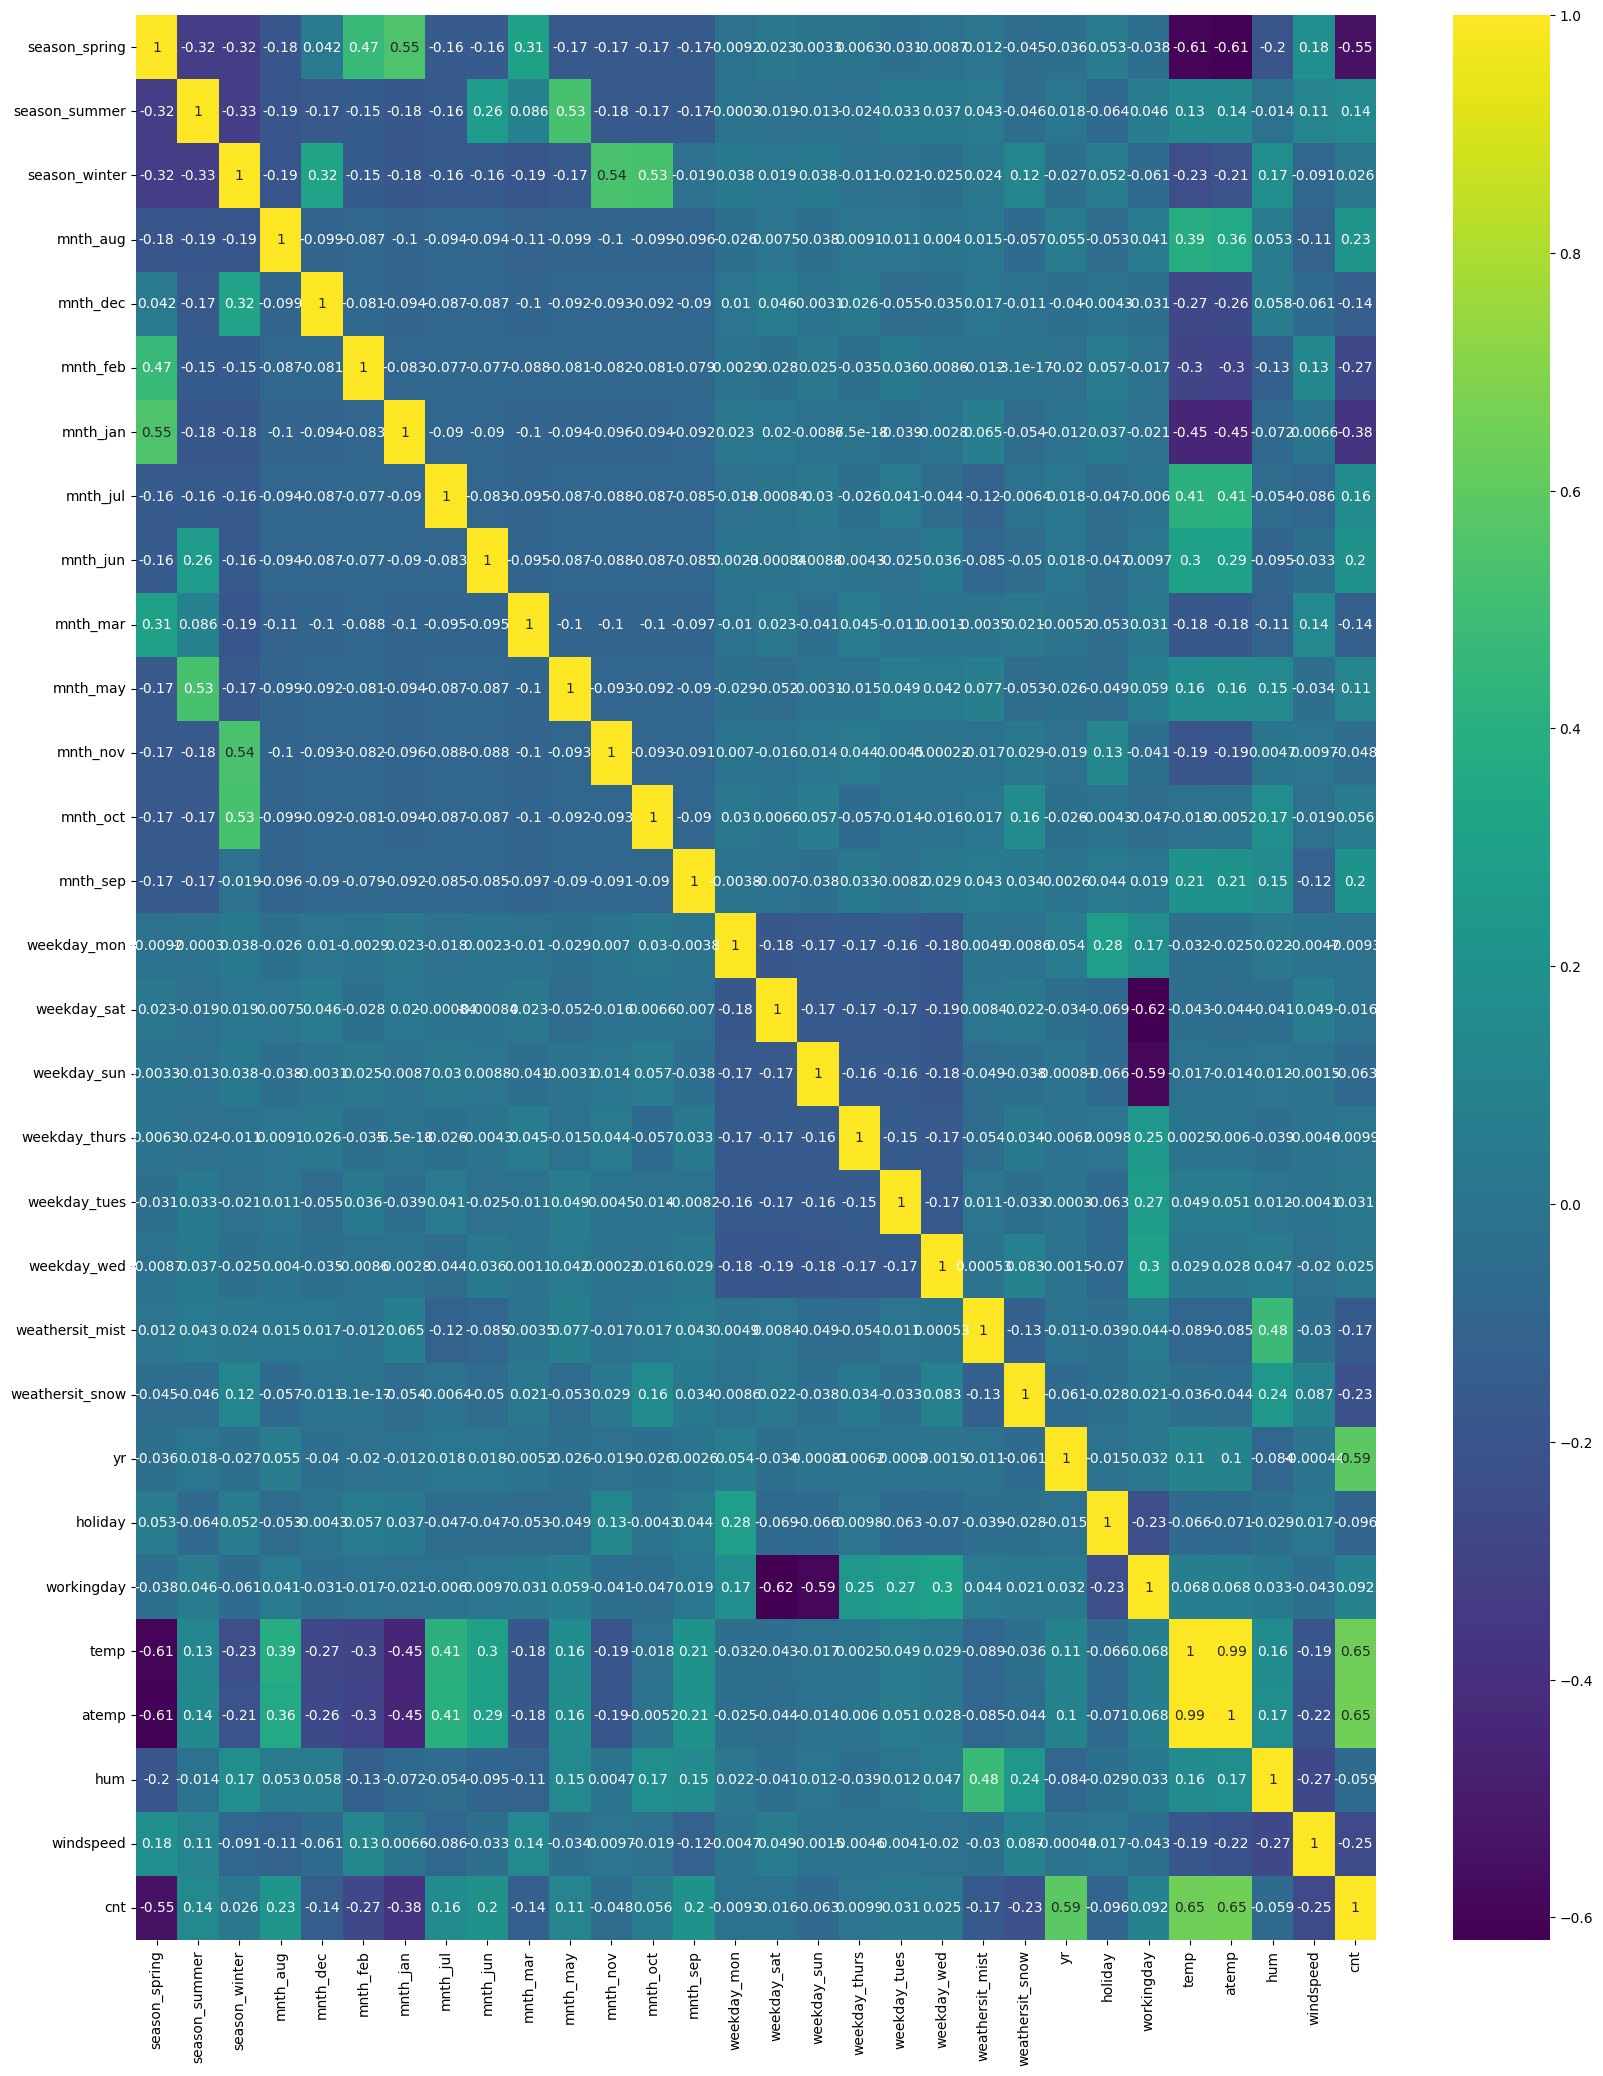

In [1936]:

#having the correlation of the variables
plt.figure(figsize = (20, 25))
sns.heatmap(train_data.corr(), annot = True, cmap = 'viridis')
#viridis
plt.show()

creating heat map for neumeric and categorical data individually

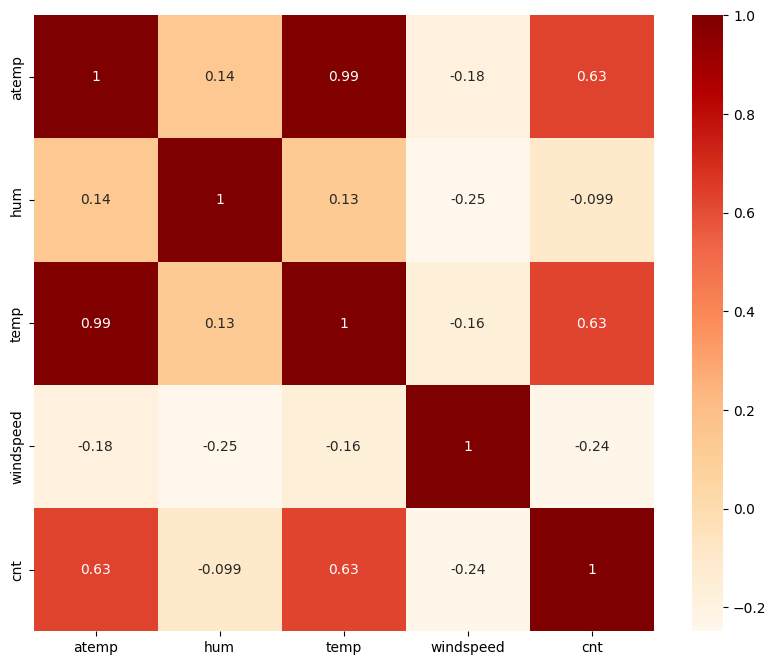

In [1937]:
# heat map for neumeric data
plt.figure(figsize = (10, 8))
corr_df = df[list(continuous_config.keys()) + ['cnt']].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'OrRd')
plt.show()


**Insights**

1. atemp and temp exhibit a strong correlation with cnt, indicating that favorable temperatures are conducive to biking.
2. atemp and temp show a strong correlation, suggesting potential redundancy. Consider employing feature elimination to assess and remove one of them.
3. windspeed and hum is negatively correlated with bike rentals, indicating unfavorable biking conditions.

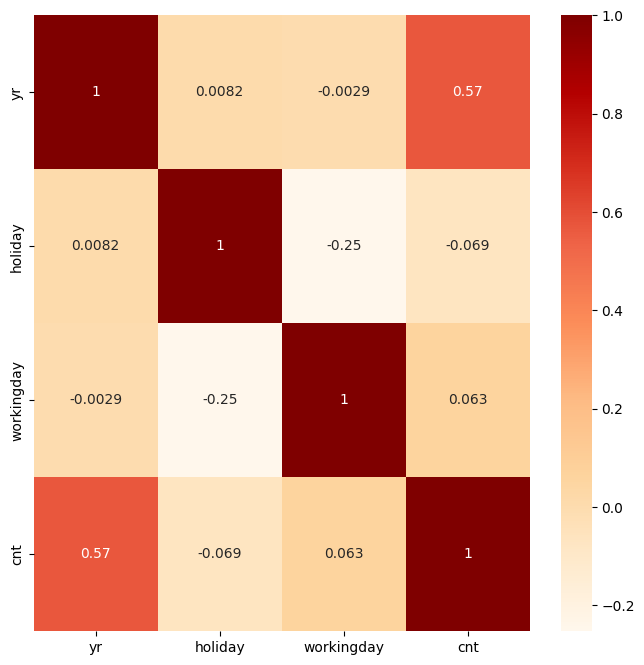

In [1938]:
#heatmap for categorical data
# Verifying the correlation - though the df has been changed
plt.figure(figsize = (8, 8))
corr_df = df_categorical[list(categorical_config.keys()) + ['cnt']].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'OrRd')
plt.show()


Dividing into X and Y sets for the model building

In [1939]:
#deleting the target variable from the independent list
y_train = train_data.pop('cnt')
X_train = train_data

# for col in X_train.select_dtypes(include=['datetime64']).columns:
#     X_train[col] = pd.to_numeric(X_train[col])


In [1940]:
y_train.shape

(510,)

In [1941]:
X_train.shape

(510, 29)

In [1942]:
X_train.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_mist,weathersit_snow,yr,holiday,workingday,temp,atemp,hum,windspeed
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.318819,0.751824,0.380981


#Step 6: Building a linear model

import library for linear regresiion and recurrent feature elimination

In [1943]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Feature Selection

In [1944]:
  # Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [1945]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 11),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thurs', False, 14),
 ('weekday_tues', False, 10),
 ('weekday_wed', False, 15),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [1946]:
#supported by RFE

col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep', 'weekday_sat', 'weathersit_mist',
       'weathersit_snow', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [1947]:

#non supported by RFE
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun', 'weekday_thurs',
       'weekday_tues', 'weekday_wed', 'atemp'],
      dtype='object')

Building model using statsmodel for the detailed statistics

In [1948]:
#building model using selected RFE variables
#creating training set with RFE selected variables

X_train_rfe = X_train[col]

Model 1  Adding a constant variable

In [1949]:
import statsmodels.api as sm
#adding constant to training variable
X_train_lm1 = sm.add_constant(X_train_rfe)

In [1950]:
X_train_lm.head()

,const,season_spring,season_summer,season_winter,mnth_jan,mnth_jul,mnth_sep,weekday_sat,weathersit_mist,weathersit_snow,yr,holiday,workingday,temp,windspeed
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.264686
426,1.0,1,0,0,0,0,0,1,1,0,1,0,0,0.442393,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.663106
482,1.0,0,1,0,0,0,0,1,1,0,1,0,0,0.395666,0.188475
111,1.0,0,1,0,0,0,0,0,1,0,0,0,1,0.345824,0.380981


Building the first linear models using statsmodels

In [1951]:
#creating first training model with rfe selected variables
lm_1 = sm.OLS(y_train, X_train_lm1).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          4.22e-191
Time:                        20:13:40   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036      6.969      0.000       0.181       0.323
season_spring      -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer       0.0508      0.015      3.423      0.001       0.022       0.080
season_winter       0.0933      0.017      5.403      0.000       0.059       0.127
mnth_jan           -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_jul           -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_sep            0.0814      0.016      4.945      0.000       0.049       0.114
weekday_sat         0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_mist    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
weathersit_snow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
yr                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday            -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday          0.0433      0.012      3.762      0.000       0.021       0.066
temp                0.5096      0.034     14.837      0.000       0.442       0.577
hum                -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed          -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1952]:
lm_1.params

,0
const,0.251893
season_spring,-0.050897
season_summer,0.050762
season_winter,0.093301
mnth_jan,-0.034512
mnth_jul,-0.052918
mnth_sep,0.081395
weekday_sat,0.053552
weathersit_mist,-0.056318
weathersit_snow,-0.247464


Checking VIF for multicollinearity

In [1953]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1954]:
# Calculate the VIFs for the new model 2

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
13,hum,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
0,season_spring,4.53
2,season_winter,3.46
1,season_summer,2.85
7,weathersit_mist,2.29
9,yr,2.09
6,weekday_sat,1.98


In general we want VIF to be less than 5. We will drop feature hum which has highest VIF and we can drop of p value greater than

Model 2 - creation of new model by droping the hum as its VIF is high

In [1955]:
# dropping hum since its vif > 5

X_train_lm2 = X_train_rfe.drop(['hum'], axis=1)

In [1956]:
X_train_lm2 = sm.add_constant(X_train_lm2)
lm_2 = sm.OLS(y_train, X_train_lm2).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.60e-188
Time:                        20:13:40   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031      5.520      0.000       0.112       0.235
season_spring      -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_summer       0.0445      0.015      2.967      0.003       0.015       0.074
season_winter       0.0784      0.017      4.562      0.000       0.045       0.112
mnth_jan           -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_jul           -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_sep            0.0755      0.017      4.527      0.000       0.043       0.108
weekday_sat         0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_mist    -0.0813      0.009     -9.437      0.000      -0.098      -0.064
weathersit_snow    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
yr                  0.2345      0.008     29.009      0.000       0.219       0.250
holiday            -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday          0.0464      0.012      3.966      0.000       0.023       0.069
temp                0.4722      0.034     14.005      0.000       0.406       0.538
windspeed          -0.1563      0.025     -6.286      0.000      -0.205      -0.107
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Insight ⁉**

Its absolutely correct to drop the 'Hum' as the R2 value changed hardly . o it was having collinearity that has been found by VIF param .


Again calculating the VIF after deleting the hum as dimention

In [1957]:
  # Calculate the VIFs for the new model 2

vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_lm2.values, i), 2) for i in range(X_train_lm2.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
0,const,62.01
1,season_spring,5.03
13,temp,3.63
3,season_winter,3.44
2,season_summer,2.62
12,workingday,1.87
7,weekday_sat,1.77
4,mnth_jan,1.56
5,mnth_jul,1.48
6,mnth_sep,1.29


Model 3 - creation of new model by droping the temp as its VIF is high

In [1958]:
# dropping season_spring since its vif > 5

X_train_lm3 = X_train_lm2.drop(['season_spring'], axis=1)

In [1959]:
X_train_lm3 = sm.add_constant(X_train_lm3)
lm_3 = sm.OLS(y_train, X_train_lm3).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.6
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          6.40e-188
Time:                        20:13:40   Log-Likelihood:                 506.55
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     496   BIC:                            -925.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1075      0.022      4.989      0.000       0.065       0.150
season_summer       0.0737      0.011      6.649      0.000       0.052       0.096
season_winter       0.1156      0.011     10.218      0.000       0.093       0.138
mnth_jan           -0.0453      0.018     -2.574      0.010      -0.080      -0.011
mnth_jul           -0.0372      0.018     -2.059      0.040      -0.073      -0.002
mnth_sep            0.0886      0.016      5.490      0.000       0.057       0.120
weekday_sat         0.0590      0.015      3.988      0.000       0.030       0.088
weathersit_mist    -0.0805      0.009     -9.284      0.000      -0.098      -0.063
weathersit_snow    -0.2890      0.024    -11.822      0.000      -0.337      -0.241
yr                  0.2334      0.008     28.699      0.000       0.217       0.249
holiday            -0.0573      0.028     -2.083      0.038      -0.111      -0.003
workingday          0.0470      0.012      3.994      0.000       0.024       0.070
temp                0.5384      0.025     21.756      0.000       0.490       0.587
windspeed          -0.1627      0.025     -6.524      0.000      -0.212      -0.114
==============================================================================
Omnibus:                       60.484   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.921
Skew:                          -0.660   Prob(JB):                     6.14e-29
Kurtosis:                       5.091   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Insight :

It is correct decesion to drop season_spring dimention

In [1960]:
  # Calculate the VIFs for the new model 3

vif = pd.DataFrame()
vif['Features'] = X_train_lm3.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_lm3.values, i), 2) for i in range(X_train_lm3.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
0,const,28.69
12,temp,1.93
11,workingday,1.87
6,weekday_sat,1.77
3,mnth_jan,1.54
2,season_winter,1.47
4,mnth_jul,1.42
1,season_summer,1.41
5,mnth_sep,1.19
10,holiday,1.16


Model 4 - creation of new model by droping the season_winter as its VIF is high

In [1961]:

# dropping season_spring since its vif > 5

X_train_lm4 = X_train_lm3.drop(['season_winter'], axis=1)


In [1962]:
X_train_lm4 = sm.add_constant(X_train_lm4)
lm_4 = sm.OLS(y_train, X_train_lm4).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     172.7
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.44e-168
Time:                        20:13:40   Log-Likelihood:                 457.83
No. Observations:                 510   AIC:                            -889.7
Df Residuals:                     497   BIC:                            -834.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2058      0.021      9.706      0.000       0.164       0.247
season_summer       0.0294      0.011      2.621      0.009       0.007       0.051
mnth_jan           -0.1156      0.018     -6.496      0.000      -0.151      -0.081
mnth_jul           -0.0663      0.020     -3.380      0.001      -0.105      -0.028
mnth_sep            0.0717      0.018      4.060      0.000       0.037       0.106
weekday_sat         0.0565      0.016      3.475      0.001       0.025       0.088
weathersit_mist    -0.0767      0.010     -8.059      0.000      -0.095      -0.058
weathersit_snow    -0.2635      0.027     -9.856      0.000      -0.316      -0.211
yr                  0.2351      0.009     26.307      0.000       0.218       0.253
holiday            -0.0532      0.030     -1.758      0.079      -0.113       0.006
workingday          0.0419      0.013      3.242      0.001       0.017       0.067
temp                0.4724      0.026     17.991      0.000       0.421       0.524
windspeed          -0.2021      0.027     -7.463      0.000      -0.255      -0.149
==============================================================================
Omnibus:                       14.362   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.263
Skew:                          -0.332   Prob(JB):                     0.000294
Kurtosis:                       3.569   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Insights :

Its not wise to drop season_winter dimention

#Step 7: Residual Analysis of the train data

In [1963]:
y_train_pred = lm_3.predict(X_train_lm3)

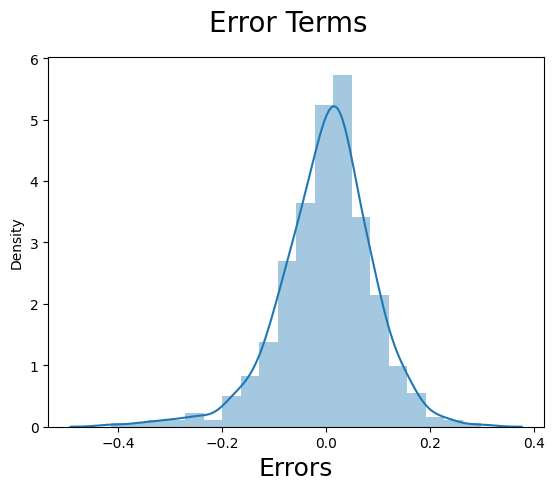

In [1964]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

Cross-verifying the above conclusion using a qq-plot as well:

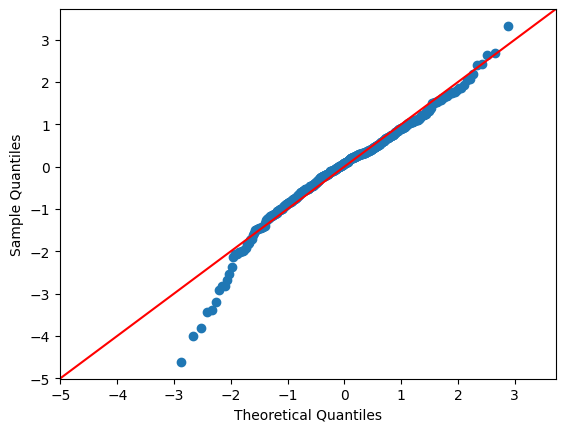

In [1965]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

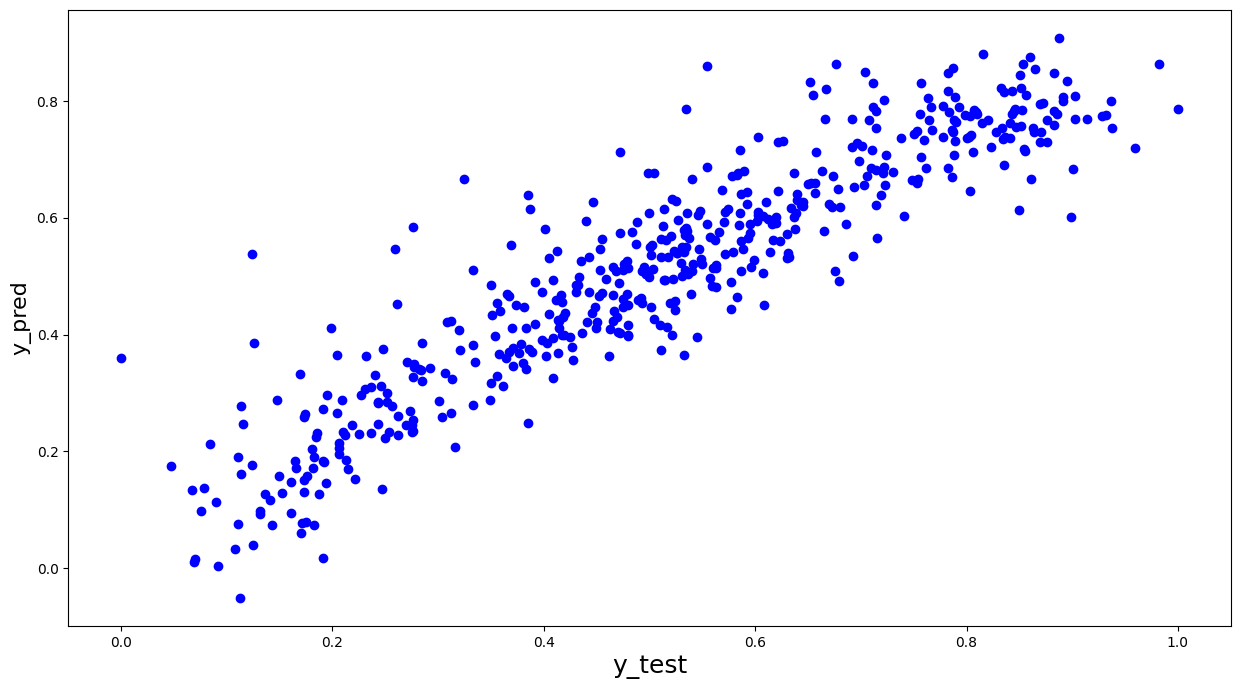

In [1966]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_train,y_train_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

Inference:
Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

#Step 8: Making Predictions Using the Final Model

Applying the scaling on the test sets

In [1967]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test_data[num_vars] = scaler.transform(test_data[num_vars])

In [1968]:
test_data.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_mist,weathersit_snow,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.318182,0.027273,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.466833,0.163248,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


Dividing into X_test and y_test

In [1969]:
test_data.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thurs', 'weekday_tues',
       'weekday_wed', 'weathersit_mist', 'weathersit_snow', 'yr', 'holiday',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [1970]:
y_test = test_data.pop('cnt')
X_test = test_data

In [1971]:
# Making predictions using the final model
X_train_lm3.drop(['const'], axis=1, inplace=True)
X_test = sm.add_constant(X_test[X_train_lm3.columns])
y_test_pred = lm_3.predict(X_test)

Calculating the r-squared

In [1972]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.840211956290356
r2_score of test dataset 0.7938439600216977


Inference:
We can see that the r_squared on the test set is 0.813 and the r-squared on the trained set 0.839 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

#Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

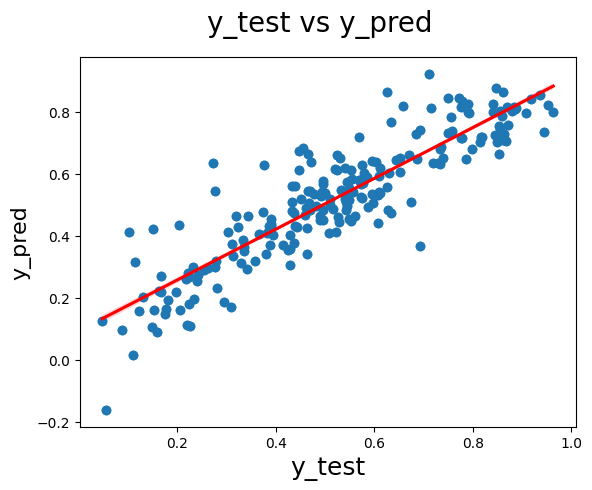

In [1973]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Inference:
We can colude that the final model fit isn't by chance, and has descent predictive power.

Getting the variable names and the coefficient values for the final equation of the best fitted line

In [1974]:
#finding out the mean squared error
from sklearn.metrics import mean_squared_error

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_test_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008031900388214674
Mean squared error of the test set is 0.009857202517674597


In [1975]:
param = pd.DataFrame(lm_3.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
12,temp,0.538412
9,yr,0.233386
2,season_winter,0.115626
0,const,0.107543
5,mnth_sep,0.088632
1,season_summer,0.073721
6,weekday_sat,0.059008
11,workingday,0.047009
4,mnth_jul,-0.037194


Final Conclusions :By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

1. From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 84% of bike demand.

2. Coeffiencients of the variables explains the factors effecting the bike demand

3. Based on final model top three features contributing significantly towards explaining the demand are:

  i. temp - coefficient : 0.5384

  ii. yr - coefficient : 0.2334

	iii. Season  
      Summer - coefficient : -0. 0.0737
      Winter – coeff - 0.1156


Hence, it can be clearly concluded that the variables temperature , season/ weather situation and yr are significant in predicting the demand for shared bikes .


#Final Recommendations for the Company:

1. The months - Aug,sept,oct,june should be considered by the company as they have a higher demand as compared to other months.sept is the highest .
2. With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
3. During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
4. Holiday time seems to be least interesting bor biking, little motavation and marketing might help here.